# 多変量での数式化と考察
機械学習のモデルを生成して結果精度が良かった場合そのモデルを採用できる。そこで、モデルによっては特徴量を変数として線形の式を出力でき、算出された係数から結果を与える条件が分かるようになる。しかし、この手法は非常に単純なデータで可能であり、様々な条件が絡み合うと適用できないこともある。

# ライブラリのインポート

In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# カテゴリ分類で作られた決定境界の直線の数式を出力
## データの読み込み

In [2]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,y,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## statsmodelsでデータの分析結果を出力
係数に着目してデータの条件を考察する。ここで、二値分類の場合、係数と変数を合算させたときに総和が0.5以上の場合に陽性と出力されるため、分類モデルでは陽性の条件が分かる。

基本的にScikit-Learnでも問題ないが、StatsmodelsではZ値とp値も出力されるため、どの変数が影響力がある変数かが分かる。

In [3]:
X = sm.add_constant(df.drop("y", axis=1))
model = sm.Logit(df["y"], X).fit_regularized()

C:\Users\decar\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\decar\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03148814694043636
            Iterations: 503
            Function evaluations: 518
            Gradient evaluations: 503


In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                           30
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                  0.9523
Time:                        13:04:49   Log-Likelihood:                -17.917
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.728e-131
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       8.9629     52.559      0.171      0.865     -94.050     111.976
mean radius                 6.9979     21.339      0.328      0.743     -34.826      48.821
mean texture                0.0224      0.626      0.036      0.971      -1.204       1.249
mean perimeter              1.3387      3.039      0.441      0.660      -4.617       7.294
mean area                  -0.1109      0.124     -0.892      0.372      -0.354       0.133
mean smoothness          -203.6587    262.736     -0.775      0.438    -718.612     311.295
mean compactness          141.4334    142.778      0.991      0.322    -138.406     421.273
mean concavity           -120.8278    117.737     -1.026      0.305    -351.589     109.933
mean concave points      -142.7686    172.404     -0.828      0.408    -480.674     195.137
mean symmetry              84.6226     70.033      1.208      0.227     -52.639     221.884
mean fractal dimension   -202.9288    408.504     -0.497      0.619   -1003.582     597.725
radius error              -50.5151     71.556     -0.706      0.480    -190.763      89.733
texture error               5.0310      4.029      1.249      0.212      -2.866      12.928
perimeter error             7.4456      6.748      1.103      0.270      -5.780      20.671
area error                 -0.3009      0.519     -0.580      0.562      -1.317       0.716
smoothness error         -539.1715   1117.271     -0.483      0.629   -2728.982    1650.639
compactness error         -61.6349    261.563     -0.236      0.814    -574.289     451.019
concavity error           335.4967    175.117      1.916      0.055      -7.726     678.720
concave points error    -1333.5654    827.872     -1.611      0.107   -2956.165     289.035
symmetry error            319.7980    401.955      0.796      0.426    -468.019    1107.615
fractal dimension error   606.8455   1503.014      0.404      0.686   -2339.008    3552.699
worst radius                2.0029      7.622      0.263      0.793     -12.937      16.943
worst texture              -1.0247      0.620     -1.653      0.098      -2.240       0.191
worst perimeter            -0.7826      0.909     -0.861      0.389      -2.564       0.999
worst area                 -0.0366      0.068     -0.540      0.589      -0.169       0.096
worst smoothness           94.9065    170.653      0.556      0.578    -239.568     429.381
worst compactness          17.6550     48.021      0.368      0.713     -76.465     111.775
worst concavity           -30.0498     34.208     -0.878      0.380     -97.097      36.997
worst concave points      -48.3774    100.620     -0.481      0.631    -245.589     148.834
worst symmetry            -86.5107     60.216     -1.437      0.151    -204.532      31.511
worst fractal dimension  -120.0636    182.543     -0.658      0.511    -477.841     237.714
===========================================================================================

Possibly complete qu

# 目的変数が数値である場合の数式化

In [5]:
df = pd.read_csv("boston.csv")
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
y_name = "PRICE"
y = df[y_name].values
x_table = df.drop([y_name],axis=1)
x_name = x_table.columns
x = x_table.values

精度の算出(最も直感的な値として絶対誤差を使用)

In [7]:
model = LR()
model.fit(x, y)
y_pred = model.predict(x)
print(mean_absolute_error(y, y_pred))

3.2708628109003173


相関係数で精度の確認と外れ値などの確認のため散布図を出力

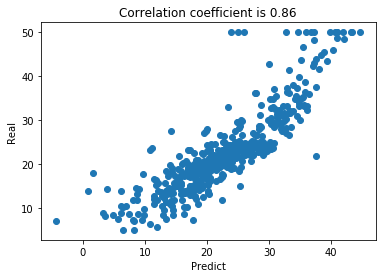

In [8]:
pr = np.array([y_pred, y])
plt.scatter(y_pred, y)
plt.title("Correlation coefficient is %.2f"%(np.corrcoef(pr)[0][1]))
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

数式を作成

In [9]:
fout = model.coef_
b = model.intercept_
#fout = np.hstack((fout,b))

# 変数の影響度合いの算出
各変数のt値を算出することでp値を算出できる。p値が小さいほど変数の信用度が高くなる。

In [10]:
RSS = np.sum((y - y_pred)**2)
RSE = np.sqrt(RSS/(len(x)-len(x[0])))
SE_sq = RSE**2 * np.linalg.inv(np.dot(x.T, x)).diagonal()
t = fout / np.sqrt(SE_sq)
p = 2*(1-stats.t.cdf(np.abs(t),(len(x)-len(x[0]))))
fout = np.hstack((fout, b))
dat=[fout, np.sqrt(SE_sq), t, p]

In [11]:
df_fout = pd.DataFrame(dat)
col = list(x_name)
col.append("intercept")
ind = ["fout", "std_err", "t-value", "p-value"]
df_fout.columns = col
df_fout.index = ind
df_fout.T

,fout,std_err,t-value,p-value
CRIM,-0.108011,0.032764,-3.296693,1.048870e-03
ZN,0.046420,0.013710,3.385938,7.660086e-04
INDUS,0.020559,0.061337,0.335176,7.376347e-01
CHAS,2.686734,0.860388,3.122702,1.897325e-03
NOX,-17.766611,3.197002,-5.557273,4.492373e-08
RM,3.809865,0.294224,12.948845,0.000000e+00
AGE,0.000692,0.013149,0.052643,9.580374e-01
DIS,-1.475567,0.186210,-7.924202,1.554312e-14
RAD,0.306049,0.063538,4.816785,1.944496e-06
TAX,-0.012335,0.003734,-3.303157,1.025504e-03


# 切片を含めてt値とp値を算出

In [12]:
fout

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

In [13]:
tmp_data = np.zeros((len(x), 1))
tmp_data = tmp_data + 1
tmp_x = np.hstack((x, tmp_data))

In [14]:
print(len(tmp_x[0]))
y_pred2 = np.dot(tmp_x, fout)
print(mean_absolute_error(y, y_pred2))

14
3.270862810900317


In [15]:
RSS = np.sum((y - y_pred2)**2)
RSE = np.sqrt(RSS/(len(tmp_x)-len(tmp_x[0])))
SE_sq = RSE**2 * np.linalg.inv(np.dot(tmp_x.T, tmp_x)).diagonal()
t = fout / np.sqrt(SE_sq)
p = 2*(1-stats.t.cdf(np.abs(t),(len(tmp_x)-len(tmp_x[0]))))
dat=[fout, np.sqrt(SE_sq), t, p]

In [16]:
df_fout = pd.DataFrame(dat)
col = list(x_name)
col.append("intercept")
ind = ["fout", "std_err", "t-value", "p-value"]
df_fout.columns = col
df_fout.index = ind
df_fout.T

,fout,std_err,t-value,p-value
CRIM,-0.108011,0.032865,-3.286517,1.086810e-03
ZN,0.046420,0.013727,3.381576,7.781097e-04
INDUS,0.020559,0.061496,0.334310,7.382881e-01
CHAS,2.686734,0.861580,3.118381,1.925030e-03
NOX,-17.766611,3.819744,-4.651257,4.245644e-06
RM,3.809865,0.417925,9.116140,0.000000e+00
AGE,0.000692,0.013210,0.052402,9.582293e-01
DIS,-1.475567,0.199455,-7.398004,6.012968e-13
RAD,0.306049,0.066346,4.612900,5.070529e-06
TAX,-0.012335,0.003761,-3.280009,1.111637e-03


これによって切片を加味したp値を算出できた。ここで、p値に着目して設定した有意水準を上回っている変数は予測をする上で多重共線性を考えられるため、削除して再度分析する必要がある。